# MSiA 422 Homework 1
    
**Jamie Chen**

**Exercise 1: Procedural vs functional Programming**

**Write a pure python code (No external libraries) to achieve the following:**
1. Create a function the will randomly generate a list of N numbers and words. Numbers and words count are random and the order is random too.
2. Create two functions to calculate the desired output as follows:
a. Procedural code by using loops
b. Functional code by using list comprehension.
3. Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions for different list sizes (N=100, 1000, 10000, 100000).

In [4]:
#I downloaded the Oxford word list, and will choose random words from here.
word_list = open('Oxford 3000 Word List.txt','r')
word_list_cleaned = word_list.read().split("\n")
#A sample of what it looks like
word_list_cleaned[:5]

['a', 'abandon', 'abandoned', 'ability', 'able']

1.1 Create a function that randomly generate a list of N numbers and words, with random order.

In [5]:
# You can change n based on the number of elements you want to generate
import random

def random_list (n):
    sample_list=[]
    for i in range(n):
        assign = random.randint(0,1)
        if assign ==0:
            sample_list.append(random.random())
        else:
            sample_list.append(random.choice(word_list_cleaned))
    return sample_list

sample_list_n = random_list(5)
sample_list_n

['constantly',
 'cheese',
 0.9668730591320381,
 0.4056831495615898,
 0.07688631087568243]

1.2 Create two functions to calculate the desired output using procedural and functional method.

In [6]:
#procedural code by using loops
def procedural_count (input_lst):
    num_count = 0
    word_count = 0
    for i in input_lst:
        if type(i)!=str:
            num_count+=1
        elif type (i) == str:
            str_word = i.split(" ")
            word_count+=len(str_word)
    print('Count of numbers:{0}\nCount of words:{1}'.format(num_count, word_count))

sample_list_count = procedural_count(sample_list_n)

Count of numbers:3
Count of words:2


In [7]:
#functional code by using list comprehension
def func_count (input_lst):
    num_count = len([i for i in input_lst if type(i) != str])
    word_split = (i.split ()for i in input_lst if type(i)==str)
    word_count = [len(i) for i in word_split]
    word_count_total = sum(word_count)
    print('Count of numbers:{0}\nCount of words:{1}'.format(num_count, word_count_total))
    
sample_list_count = func_count(sample_list_n)

Count of numbers:3
Count of words:2


1.3 Use TimeIt and matplotlib to present the performance difference among the 2 solutions for different list sizes (N=100, 1000, 10000, 100000).

In [8]:
import timeit 

n=[100, 1000,10000,100000]

x=n[0]
print(x)

p_times =[]
f_times =[]  

p_times.append(timeit.timeit(lambda: procedural_count(random_list(n[0])), number=1))
f_times.append(timeit.timeit(lambda: func_count(random_list(n[0])),number=1))

p_times.append(timeit.timeit(lambda: procedural_count(random_list(n[1])), number=1))
f_times.append(timeit.timeit(lambda: func_count(random_list(n[1])),number=1))

p_times.append(timeit.timeit(lambda: procedural_count(random_list(n[2])), number=1))
f_times.append(timeit.timeit(lambda: func_count(random_list(n[2])),number=1))

p_times.append(timeit.timeit(lambda: procedural_count(random_list(n[3])), number=1))
f_times.append(timeit.timeit(lambda: func_count(random_list(n[3])),number=1))

print('For n = {0}, Procedural timer:{1}\nFunctional timer:{2}'.format(n, p_times, f_times))

100
Count of numbers:48
Count of words:60
Count of numbers:49
Count of words:54
Count of numbers:514
Count of words:538
Count of numbers:490
Count of words:568
Count of numbers:4904
Count of words:5707
Count of numbers:4896
Count of words:5768
Count of numbers:49898
Count of words:56263
Count of numbers:50026
Count of words:56221
For n = [100, 1000, 10000, 100000], Procedural timer:[0.0005012619949411601, 0.0029277979920152575, 0.02772095601540059, 0.30347626202274114]
Functional timer:[0.000482016010209918, 0.0027512109954841435, 0.03464403501129709, 0.2635109190014191]


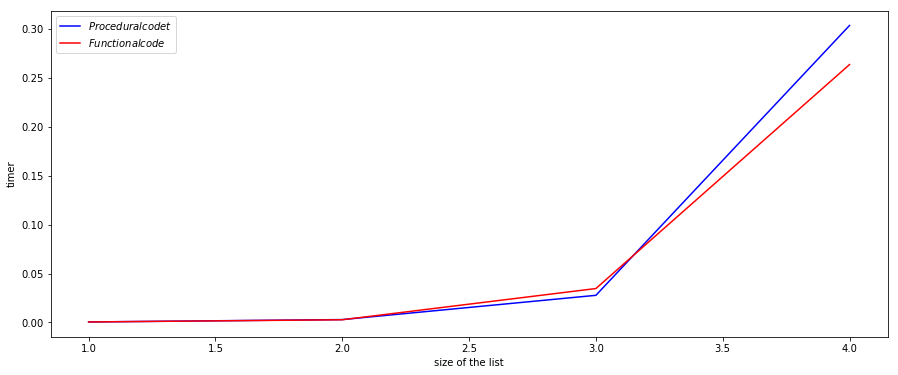

In [12]:
#line chart of the time it takes to run procedural code vs functional code using list comprehension
#As size of the list increases, functional code takes less time to run compared to procedural code.

import matplotlib.pyplot as plt
x = [1,2,3,4]

plt.rcParams['figure.figsize'] = 15,6
p = plt.plot(x, p_times, color = 'blue')
f = plt.plot(x, f_times, color = 'red')

plt.ylabel('timer')
plt.xlabel('size of the list')
plt.legend(['$Procedural codet$', '$Functional code$'], loc='best', fontsize=10)
plt.show()

## Exercise 2 - Simple student gradient system

In [15]:
#read in and clean data

def readin():
    raw_data = open('exams.csv','r')
    students = raw_data.read().split('\n')
    students_cleaned = [i.split (',') for i in students]
    return students_cleaned

students_list = readin()
print (students_list[:5])

[['id', 'Name', 'Quizzes', 'Projects', 'Exams'], ['ID1', 'James', '43', '51', '55'], ['ID2', 'Josephine', '76', '84', '87'], ['ID3', 'Art', '89', '94', '92'], ['ID4', 'Lenna', '70', '67', '64']]


In [2]:
#Use student names as keys, calculate final score based on quiz, project and exam
keys=[]
final_score =[]

for row in students_list[1:]:
    keys.append(row[1])
    score = 0.3*float(row[2]) +0.3*float(row[3])+0.4*float(row[4])
    final_score.append(score)

In [3]:
#calculate final grade based on score
letter_grade=[]
for i in final_score:
    if i<10:
        letter_grade.append('F')
    elif 10 <= i <20:
        letter_grade.append('D')
    elif 20<=i<80:
        letter_grade.append('C')
    elif 80<= i<90:
        letter_grade.append('B')
    else:
        letter_grade.append('A')


In [7]:
#sort student names before building a dictionary
keys.sort()
print(keys)

['Abel', 'Albina', 'Alisha', 'Alishia', 'Allene', 'Amber', 'Ammie', 'Arlene', 'Arlette', 'Art', 'Bernardo', 'Bette', 'Blair', 'Blondell', 'Bobbye', 'Brock', 'Cammy', 'Carma', 'Carmelina', 'Cecily', 'Chanel', 'Cory', 'Danica', 'Deeanna', 'Delisa', 'Delmy', 'Devorah', 'Dominque', 'Donette', 'Dyan', 'Elly', 'Elvera', 'Elza', 'Emerson', 'Erick', 'Ernie', 'Ezekiel', 'Fatima', 'Fletcher', 'Francine', 'Gladys', 'Graciela', 'Ilene', 'Jamal', 'James', 'Jina', 'Johnetta', 'Jose', 'Josephine', 'Kallie', 'Kanisha', 'Karl', 'Kati', 'Kiley', 'Kris', 'Lai', 'Laurel', 'Lavera', 'Lenna', 'Leota', 'Lettie', 'Lisha', 'Lorrie', 'Malinda', 'Marjory', 'Maryann', 'Mattie', 'Maurine', 'Meaghan', 'Micaela', 'Minna', 'Mitsue', 'Moon', 'Myra', 'Natalie', 'Penney', 'Roxane', 'Rozella', 'Sabra', 'Sage', 'Shenika', 'Simona', 'Solange', 'Stephaine', 'Stephen', 'Tamar', 'Tammara', 'Tawna', 'Timothy', 'Tonette', 'Tyra', 'Valentine', 'Vallie', 'Veronika', 'Viva', 'Wilda', 'Willard', 'Willow', 'Youlanda', 'Yuki']


In [8]:
#create a dictionary using student names as keys

def create_dict(name,score,grade):
    students={}
    for i in range(len(name)):
        students[name[i]] = {}
        students[name[i]]['score'] = score[i]
        students[name[i]]['grade'] = grade[i]
    return students

final_dict = create_dict(keys,final_score,letter_grade)
print(final_dict)

{'Abel': {'score': 50.2, 'grade': 'C'}, 'Albina': {'score': 82.80000000000001, 'grade': 'B'}, 'Alisha': {'score': 91.7, 'grade': 'A'}, 'Alishia': {'score': 66.69999999999999, 'grade': 'C'}, 'Allene': {'score': 59.8, 'grade': 'C'}, 'Amber': {'score': 67.4, 'grade': 'C'}, 'Ammie': {'score': 38.8, 'grade': 'C'}, 'Arlene': {'score': 68.5, 'grade': 'C'}, 'Arlette': {'score': 64.1, 'grade': 'C'}, 'Art': {'score': 63.8, 'grade': 'C'}, 'Bernardo': {'score': 44.2, 'grade': 'C'}, 'Bette': {'score': 52.099999999999994, 'grade': 'C'}, 'Blair': {'score': 55.8, 'grade': 'C'}, 'Blondell': {'score': 74.0, 'grade': 'C'}, 'Bobbye': {'score': 59.8, 'grade': 'C'}, 'Brock': {'score': 71.39999999999999, 'grade': 'C'}, 'Cammy': {'score': 75.4, 'grade': 'C'}, 'Carma': {'score': 70.9, 'grade': 'C'}, 'Carmelina': {'score': 80.5, 'grade': 'B'}, 'Cecily': {'score': 73.9, 'grade': 'C'}, 'Chanel': {'score': 61.2, 'grade': 'C'}, 'Cory': {'score': 82.7, 'grade': 'B'}, 'Danica': {'score': 68.6, 'grade': 'C'}, 'Deeanna

In [9]:
import statistics

def score_summary():
    print("The number of students is:",len(final_dict))
    print("The minimum student score is:", round((min(v['score'] for k,v in final_dict.items())),2))
    print("The maximum student score is:", round((max(v['score'] for k,v in final_dict.items())),2))
    print("The mean student score is:", round((statistics.mean(v['score'] for k,v in final_dict.items())),2))
    print("The mode of student letter grade is:", (statistics.mode(v['grade'] for k,v in final_dict.items())))
    print("The standard deviation of student score is:", round((statistics.stdev(v['score'] for k,v in final_dict.items())),2)) 

print(score_summary())

The number of students is: 100
The minimum student score is: 31.8
The maximum student score is: 99.7
The mean student score is: 69.05
The mode of student letter grade is: C
The standard deviation of student score is: 14.2
None


In [10]:
#identify values larger than the mean + 2*std
def extreme_values():
    value =[]
    mean = statistics.mean(v['score'] for k,v in final_dict.items())
    stdv = statistics.stdev(v['score'] for k,v in final_dict.items())
    for k,v in final_dict.items():
        if v['score'] > mean+2*stdv:
            value.append(v['score'])
    return value

print(extreme_values())

[99.7, 97.9]


In [11]:
letter_count={}

for i in letter_grade:
    if i in letter_count:
        letter_count[i] +=1
    else:
        letter_count[i] =1
print(letter_count)

{'C': 74, 'B': 17, 'A': 9}


In [12]:
#pie chart showing the final letter grades distribution.
import matplotlib.pyplot as plt

plt.figure(figsize=plt.figaspect(1))
values = [74, 17, 9] 
labels = ['C', 'B', 'A',] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
#plt.show()

([<matplotlib.patches.Wedge at 0x1174ea7f0>,
  <matplotlib.text.Text at 0x11750a828>])

In [13]:
#create boxplot parameters, compute the numbers [min, max, medial, Q1, Q3] for a box plot
def box_plot():
    final_score.sort()
    print("box plot min:", round(min(final_score),2))
    print("box plot max:", round(max(final_score),2))
    print("box plot median:", round(statistics.median(final_score),2))
    print("box plot Q1:", round(statistics.median(final_score[0:50]),2))
    print("box plot Q3:", round(statistics.median(final_score[50:100]),2))

print (box_plot())

box plot min: 31.8
box plot max: 99.7
box plot median: 68.65
box plot Q1: 60.25
box plot Q3: 80.3
None


Hello, please refer to the menu below: 

[1] Enter 1 to load the data from exams.csv file.
[2] Enter 2 to print a list of student names, final scores, and letter grades sorted by names.
[3] Enter 3 to print a score summary.
[4] Enter 4 to print values larger than the mean and two times standard deviation.
[5] Enter 5 to plot a pie chart.
[6] Enter 6 to view box plot parameters.
[q] Enter q to quit.

What would you like to do?1

Exams.csv is now loaded.


[1] Enter 1 to load the data from exams.csv file.
[2] Enter 2 to print a list of student names, final scores, and letter grades sorted by names.
[3] Enter 3 to print a score summary.
[4] Enter 4 to print values larger than the mean and two times standard deviation.
[5] Enter 5 to plot a pie chart.
[6] Enter 6 to view box plot parameters.
[q] Enter q to quit.

What would you like to do?2
{'Abel': {'score': 31.799999999999997, 'grade': 'C'}, 'Albina': {'score': 32.3, 'grade': 'B'}, 'Alisha': {'score': 38.8, 'grade': 'A'}, 'Alishia': {'sc

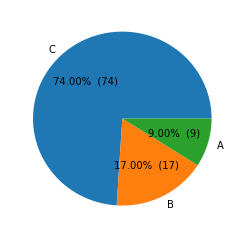


[1] Enter 1 to load the data from exams.csv file.
[2] Enter 2 to print a list of student names, final scores, and letter grades sorted by names.
[3] Enter 3 to print a score summary.
[4] Enter 4 to print values larger than the mean and two times standard deviation.
[5] Enter 5 to plot a pie chart.
[6] Enter 6 to view box plot parameters.
[q] Enter q to quit.

What would you like to do?6
box plot min: 31.8
box plot max: 99.7
box plot median: 68.65
box plot Q1: 60.25
box plot Q3: 80.3

[1] Enter 1 to load the data from exams.csv file.
[2] Enter 2 to print a list of student names, final scores, and letter grades sorted by names.
[3] Enter 3 to print a score summary.
[4] Enter 4 to print values larger than the mean and two times standard deviation.
[5] Enter 5 to plot a pie chart.
[6] Enter 6 to view box plot parameters.
[q] Enter q to quit.

What would you like to do?7

I don't understand that choice, please try again.


[1] Enter 1 to load the data from exams.csv file.
[2] Enter 2 to pr

In [14]:
print("Hello, please refer to the menu below: ")

choice = ''

while choice != 'q':
    print("\n[1] Enter 1 to load the data from exams.csv file.")
    print("[2] Enter 2 to print a list of student names, final scores, and letter grades sorted by names.")
    print("[3] Enter 3 to print a score summary.")
    print("[4] Enter 4 to print values larger than the mean and two times standard deviation.")
    print("[5] Enter 5 to plot a pie chart.")
    print("[6] Enter 6 to view box plot parameters.")
    print("[q] Enter q to quit.")
    
    choice = input("\nWhat would you like to do?")
    
    if choice == '1':
        print("\nExams.csv is now loaded.\n")
    elif choice == '2':
        print(create_dict(keys,final_score,letter_grade))
    elif choice == '3':
        score_summary()
    elif choice =='4':
        print(extreme_values())
    elif choice =='5':
        plt.show()
    elif choice =='6':
        box_plot()
    elif choice == 'q':
        print("\nThanks for your time.\n")
    else:
        print("\nI don't understand that choice, please try again.\n")


## Exercise 3 - PyPI extension library

Summarize the functionality provided by the library (one paragraph) and show a usage example:
The python external library that I would like to explore is Plotly, which can import data easily and create many creative visualizations. I chose this library to explore because it is a very useful tool for displaying the data insights which is very important for data science projects. I have installed plotly in my terminal and will show a usage example using an online csv dataset.

In [23]:
#import plotly.offline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print (__version__)

2.0.15


In [24]:
#step 1: import plotly and import data
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")
df

,School,Women,Men,gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47
5,Chicago,78,118,40
6,Georgetown,94,131,37
7,Tufts,76,112,36
8,Yale,79,114,35
9,Columbia,86,119,33


In [25]:
#step 2: create table
init_notebook_mode(connected=True)
table = ff.create_table(df)
table
iplot(table)